In [1]:
import sys
assert sys.version_info >=(3,5)

In [2]:
import sklearn 
assert sklearn.__version__ >= "0.20"

In [3]:
import numpy as np
import os

In [4]:
np.random.seed(42)

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize =14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize =12)

In [6]:
PROJECT_ROOT_DIR ="."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

In [7]:
def save_fig(fig_id, tight_layout = True , fig_extension = "png", resolution = 300):
    path = os.path.join(IMAGES_PATH ,fig_id + "."+fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension , dpi = resolution)

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X,y = mnist["data"].to_numpy(),mnist["target"].to_numpy() 
#  .to_numpy() 로 타입을 ndarray로 바꿔주기
print(type(X),type(y))
X.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
print(X[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

Saving figure some_digit_plot


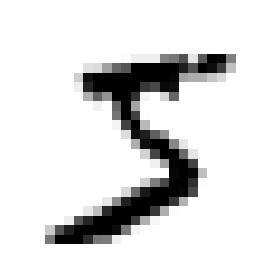

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [13]:
y[0]

'5'

In [14]:
y = y.astype(np.uint8)
y[0]

5

Saving figure digits_plot


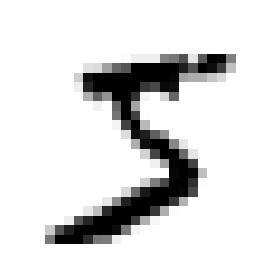

In [15]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap =mpl.cm.binary,
              interpolation="nearest")
    #interpolation="nearest" 색을 선명하게 보이게함
    plt.axis("off")
example_image = X[0]
plot_digit(example_image)
save_fig("digits_plot")
plt.show()

In [16]:
def plot_digits(instances, images_per_row=10,**options):
    size =28 
    images_per_row = min(len(instances),images_per_row) 
    #10개보다 적은게 들어왔을 경우 예외처리 
    images = [instance.reshape(size,size) for instance in instances]
    # 28x28을 재정의한 instance들이 쌓여있음 
#     print(len(instances))
    n_rows =(len(instances)-1)//images_per_row +1
    # 맨 처음에 나오는 부분을 0으로 나오게 하기 위해 이렇게 계산/ 세로가 몇줄인지  
    row_images =[]
    n_empty = n_rows *images_per_row -len(instances) 
    #빈칸개수계산
#     print((size, size* n_empty))
#     print(np.zeros((size, size* n_empty)))
    images.append(np.zeros((size, size* n_empty)))
    #빈칸에 0채워넣음
    for row in range(n_rows):
        rimages = images[row *images_per_row :(row+1)*images_per_row]
        row_images.append(np.concatenate(rimages,axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


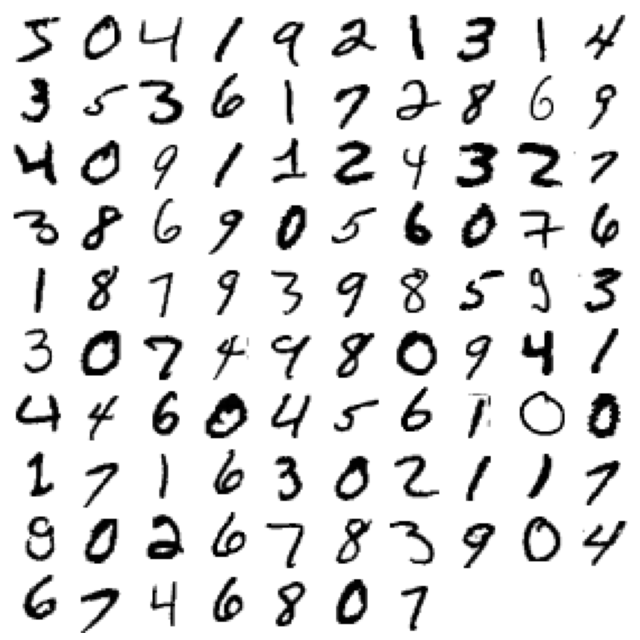

In [17]:
plt.figure(figsize =(9,9))
example_images = X[:97]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [18]:
X_train, X_test, y_train, y_test =X[:60000],X[60000:], y[:60000],y[60000:]

In [19]:
y_train_5 =(y_train == 5)
y_test_5 =(y_test == 5)

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([example_image])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train_5, cv=3,scoring="accuracy")
#5를 포함한 레이블을 돌려보는 것 
# cross_val_score(sgd_clf, X_train,y_train, cv=3,scoring="accuracy") 
# 전체레이블을 돌려보는 것 

array([0.95035, 0.96035, 0.9604 ])

In [23]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y =None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [24]:
never_5_clf = Never5Classifier()
# 가짜분류기를 생성
cross_val_score(never_5_clf,X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train , y_train_5 , cv =3)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5 , y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [27]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [29]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1,1]/(cm[0,1]+cm[1,1]) # 정밀도

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred) #재현율

0.6511713705958311

In [31]:
cm[1,1]/(cm[1,0] +cm[1,1]) #재현율 

0.6511713705958311

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [33]:
cm[1,1]/(cm[1,1]+cm[1,0]+cm[0,1]/2)

0.6123688090901206

In [34]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [35]:
threshold =0
y_some_digit_pred = (y_scores > threshold)

In [36]:
y_some_digit_pred

array([ True])

In [37]:
threshold= 8000
y_some_digit_pred = (y_scores >threshold)
y_some_digit_pred

array([False])

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method = "decision_function")

In [39]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


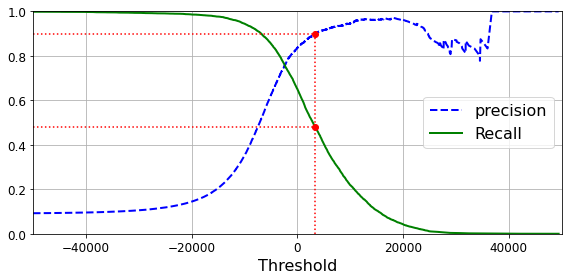

In [40]:
#정밀도 재현율 트레이드 오프 그래프 그리기
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="precision",linewidth=2)
    plt.plot(thresholds, recalls[:-1],"g-",label="Recall",linewidth=2)
    plt.legend(loc="center right",fontsize=16)
    plt.xlabel("Threshold", fontsize =16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
    
    
recall_90_precision = recalls[np.argmax(precisions >=0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision, threshold_90_precision],[0., 0.9],"r:")
plt.plot([-50000,threshold_90_precision], [0.9,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")
plt.plot([threshold_90_precision],[0.9],"ro")
plt.plot([threshold_90_precision],[recall_90_precision],"ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

Saving figure precision_vs_recall_plot


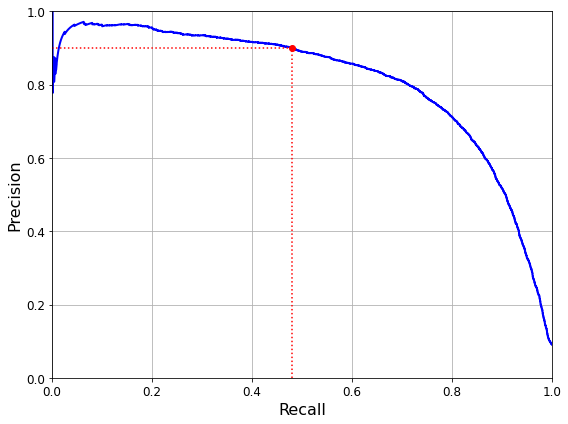

In [41]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls, precisions, "b-", linewidth = 2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision",fontsize =16)
    plt.axis([0,1,0,1])
    plt.grid(True)
    
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
plt.plot([recall_90_precision, recall_90_precision],[0.,0.9],"r:")
plt.plot([0.0, recall_90_precision],[0.9,0.9],"r:")
plt.plot([recall_90_precision],[0.9],"ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [43]:
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]

In [44]:
threshold_90_precision

3370.0194991439557

In [45]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [46]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [47]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


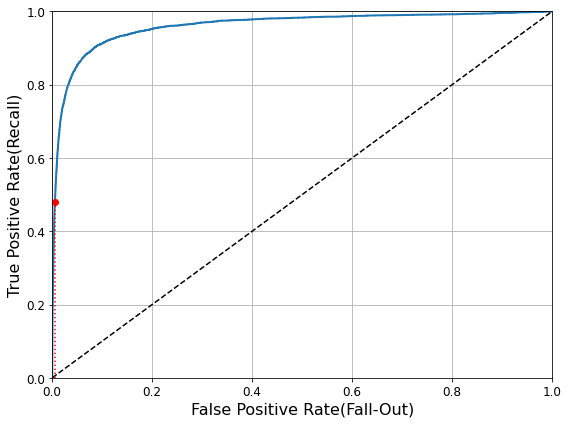

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate(Fall-Out)',fontsize=16)
    plt.ylabel('True Positive Rate(Recall)',fontsize=16)
    plt.grid(True)
    
plt.figure(figsize =(8,6))
plot_roc_curve(fpr,tpr)
fpr_90 =fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0., recall_90_precision],"r:")
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],"r:")
plt.plot([fpr_90],[recall_90_precision],"ro")
save_fig("roc_curve_plot")
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5, cv=3 ,
                                   method = "predict_proba")

In [58]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest , tpr_forest , thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


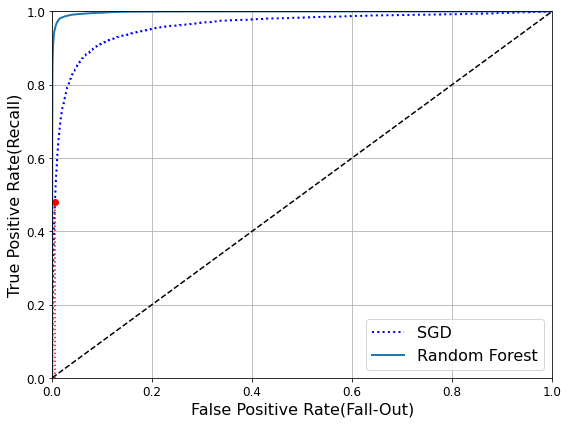

In [60]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize =(8,6))
plt.plot(fpr,tpr,"b:",linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90],[0,recall_90_precision],"r:")
plt.plot([0.0, fpr_90],[recall_90_precision, recall_90_precision],"r:")
plt.plot([fpr_90],[recall_90_precision],"ro")
plt.grid(True)
plt.legend(loc ="lower right", fontsize = 16)
save_fig("roc_curve_comparison_plot")
plt.show()


In [62]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [65]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [66]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

In [67]:
from sklearn.svm import SVC

svm_clf = SVC(gamma ="auto", random_state =42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [68]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [70]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000],y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [72]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [73]:
np.argmax(some_digit_scores) # 가장 높은 값을 뽑음

5

In [75]:
svm_clf.classes_ #클래스를 9까지 분류

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [76]:
svm_clf.classes_[5] # 클래스 5번째는 무엇인가 

5

In [77]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [82]:
len(ovr_clf.estimators_)

10

In [88]:
sgd_clf.fit(X_train, y_train)
# sgd_clf.predict([some_digit])

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  55. 148.
 210. 253. 253. 113.  87. 148.  55.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  87. 232. 252.
 253. 189. 210. 252. 252. 253. 168.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.  57. 242. 252. 190.
  65.   5.  12. 182. 252. 253. 116.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  96. 252. 252. 183.  14.
   0.   0.  92. 252. 252. 225.  21.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 132. 253. 252. 146.  14.   0.
   0.   0. 215. 252. 252.  79.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 126. 253. 247. 176.   9.   0.   0.
   8.  78. 245. 253. 129.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  16. 232. 252. 176.   0.   0.   0.  36.
 201. 252. 252. 169.  11.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  22. 252. 252.  30.  22. 119. 197. 241.
 253. 252. 251.  77.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  16. 231. 252. 253. 252. 252. 252. 226.
 227. 252. 231.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  55. 235. 253. 217. 138.  42.  24.
 192. 252. 143.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  62.
 255. 253. 109.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  71.
 253. 252.  21.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 253. 252.  21.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  71.
 253. 252.  21.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 106.
 253. 252.  21.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  45.
 255. 253.  21.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 218. 252.  56.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  96. 252. 189.  42.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  14. 184. 252. 170.  11.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  14. 147. 252.  42.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

[9]


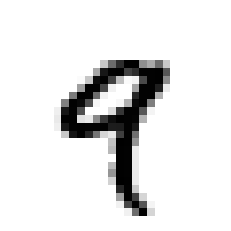

array([[-45606.88156161, -20077.79903687, -23620.86693862,
        -11077.35532351,  -8578.08720996,  -7133.8897717 ,
        -27033.93740198,  -8312.88994614,  -3257.29010483,
          2193.22821614]])

In [92]:
print(sgd_clf.predict([X[4]]))
plot_digit(X[4])
plt.show()
sgd_clf.decision_function([X[4]])

In [94]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv= 3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [96]:
#오차행렬 그리기
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv =3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [ ]:
# 오차행렬을 색으로 표현하기 

def plot_confusion_matrix (matrix):
    """If you prefer color and a colorbar """
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
plt.matshow(conf_mx , cmap = plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show